# IPL DATA Analysis

There are two data setes which we are going to use in this project
one dataset has match details and other one has player details.
The data we are going to use is collected from 2013 to 2020
we will start with data cleaning and modify data accordingly with the analysis and visualize our analysis.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
match=pd.read_csv("Match.csv",encoding="utf-8")
Ball=pd.read_csv("Ball.csv",encoding="utf-8")
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
match.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [7]:
Ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [10]:
Ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
Ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [12]:
match["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [15]:
match["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

Adding new column to a table which is year column we need to extact the year from date column in match data

In [17]:
match["year"]=pd.to_datetime(match["date"]).dt.year

In [18]:
match["year"].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int64

Total number of match in each year 

In [20]:
match["year"].value_counts() ### here we will get in order either in asc or des

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: year, dtype: int64

we will use group by to find the number of matches

In [78]:
match1=match.groupby("year")["id"].count()
match1=match1.reset_index()
match1.rename(columns={"id":"number of matches played in that year"},inplace=True)
match1

,year,number of matches played in that year
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


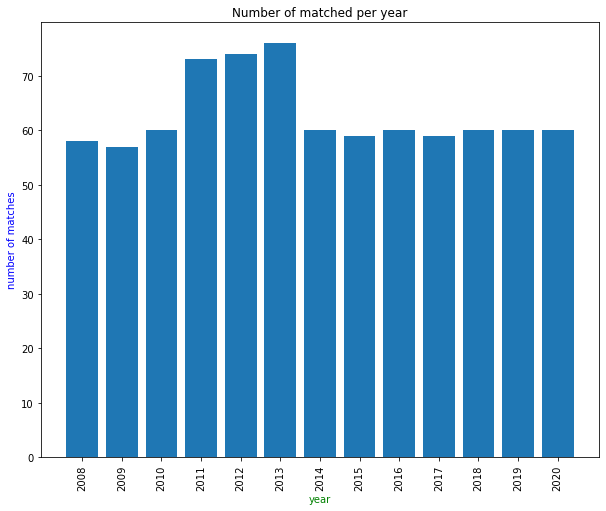

In [50]:
plt.figure(figsize=(10,8))
plt.bar(s["year"],s["number of matches played in that year"])
plt.xlabel("year",color='g')
plt.ylabel("number of matches",color="b")
plt.title("Number of matched per year")
plt.xticks(s["year"],rotation=90)
plt.show()

we can see from the bar graph that in the year 2013 maximum number of matches were been played

Find the total number of runs in each year ?

we are going to merge the data from both the data frames for analyse

In [62]:
season=match[["id","year"]].merge(Ball,left_on="id",right_on="id",how="left").drop(["id"],axis=1) ### here we are going to take add year column in ball dataframe
season.head() 

,year,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [67]:
no=season.groupby("year")["total_runs"].sum().reset_index()
no

,year,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


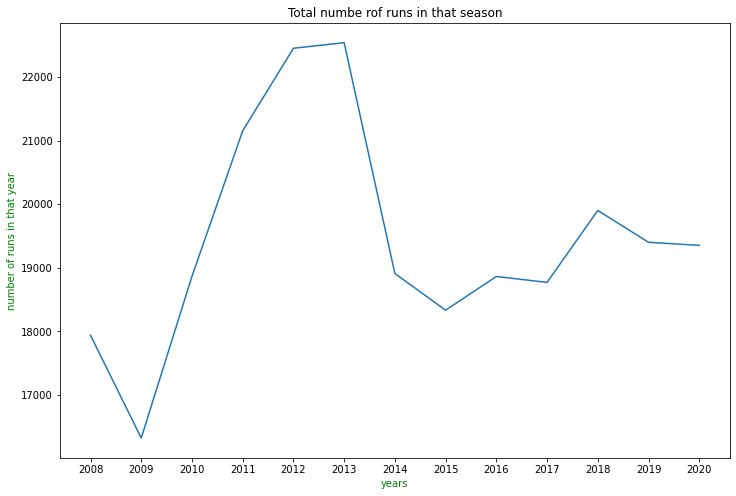

In [75]:
plt.figure(figsize=(12,8))
plt.plot(no["year"],no["total_runs"])
plt.xlabel("years",color='g')
plt.ylabel("number of runs in that year",color='g')
plt.xticks(no["year"])
plt.title("Total numbe rof runs in that season")
plt.show()

we can see from the line graph that in the year 2013 the  highest number of runs are  seen and there is a drastic decrease in  total number of  runs in the next year 

In [76]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


Number of runs per each match?
first find numnbe of runs using match data frame
then we can use this total runs from ball data frame

In [92]:
m=match.groupby("year")["id"].count().reset_index().rename(columns={"id":"number of matches"})
print(m)
no ## in this umber of runs are been stores wiht respect to years

    year  number of matches
0   2008                 58
1   2009                 57
2   2010                 60
3   2011                 73
4   2012                 74
5   2013                 76
6   2014                 60
7   2015                 59
8   2016                 60
9   2017                 59
10  2018                 60
11  2019                 60
12  2020                 60


,year,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [101]:
run=pd.merge(m,no,on="year",how="left") ### new data frame with number of runs,n=number of matches
run["runs per match"]=round(run["total_runs"]/run["number of matches"])
run

,year,number of matches,total_runs,runs per match
0,2008,58,17937,309.0
1,2009,57,16320,286.0
2,2010,60,18864,314.0
3,2011,73,21154,290.0
4,2012,74,22453,303.0
5,2013,76,22541,297.0
6,2014,60,18909,315.0
7,2015,59,18332,311.0
8,2016,60,18862,314.0
9,2017,59,18769,318.0


Number of tosses won by each team?

In [124]:
p=set(match["team1"].unique())
#print(p)
q=set(match["team2"].unique())
print(q.difference(p))  

set()


we got a empty set which means both the columns has the same teams

In [139]:
toss=match.groupby("team1")["toss_winner"].count().sort_values(ascending=False).reset_index().rename(columns={"toss_winner":"Total_number_winning_toss","team1":"Teams"})
toss

,Teams,Total_number_winning_toss
0,Royal Challengers Bangalore,108
1,Mumbai Indians,97
2,Kolkata Knight Riders,95
3,Chennai Super Kings,94
4,Kings XI Punjab,92
5,Delhi Daredevils,83
6,Rajasthan Royals,70
7,Sunrisers Hyderabad,59
8,Deccan Chargers,39
9,Pune Warriors,23


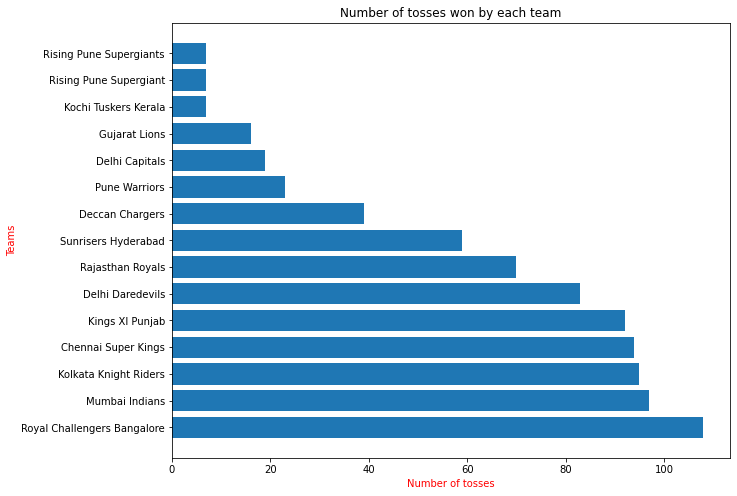

In [145]:
plt.figure(figsize=(10,8))
plt.title("Number of tosses won by each team")
plt.barh(toss["Teams"],toss["Total_number_winning_toss"])
plt.xlabel("Number of tosses",color="r")
plt.ylabel("Teams",color='r')
plt.show()

Toss decisions across years

In [150]:
match["toss_decision"].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

In [171]:
y=match[["toss_decision","year"]].groupby(["year","toss_decision"]).size().reset_index().rename(columns={0:"Number of tosses"})
print(y)


    year toss_decision  Number of tosses
0   2008           bat                26
1   2008         field                32
2   2009           bat                35
3   2009         field                22
4   2010           bat                39
5   2010         field                21
6   2011           bat                25
7   2011         field                48
8   2012           bat                37
9   2012         field                37
10  2013           bat                45
11  2013         field                31
12  2014           bat                19
13  2014         field                41
14  2015           bat                25
15  2015         field                34
16  2016           bat                11
17  2016         field                49
18  2017           bat                11
19  2017         field                48
20  2018           bat                10
21  2018         field                50
22  2019           bat                10
23  2019        

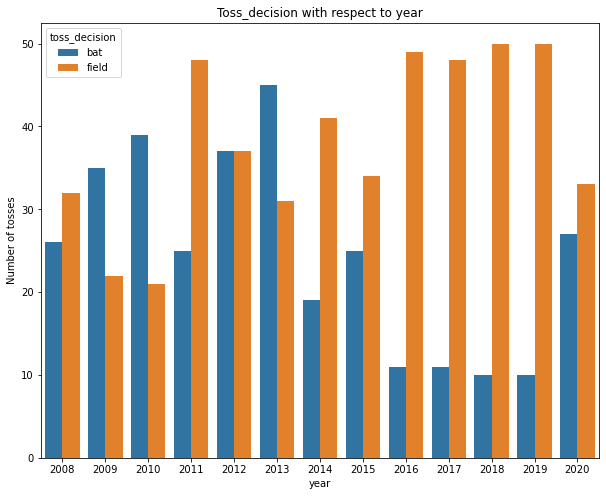

In [177]:
plt.figure(figsize=(10,8))
sns.barplot(x="year",y="Number of tosses",hue="toss_decision",data=y)
plt.title("Toss_decision with respect to year")
plt.show()

From the bar chart we can tell that  team who won the toss has highest chamces of picking field compared with bating

Comparing matches with respect to wickets

In [183]:
match["result"].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

we can tell  that highest number of matches won are by wickets 

 which stadium is best for wining by wickets?

In [292]:
w=match.groupby(["result","venue"])["venue"].count()
new=w.to_frame()
#w=w.reset_index()
new.rename(columns={"venue":"number of time matche was in that stadium"},inplace=True)
new=new.reset_index()
see=new[new["result"]=="wickets"]
see.sort_values("number of time matche was in that stadium",ascending=False).head(1)

,result,venue,number of time matche was in that stadium
52,wickets,Eden Gardens,45


In [255]:
match[match["result"]=="wickets"]["venue"].value_counts()

Eden Gardens                                            45
Feroz Shah Kotla                                        37
Wankhede Stadium                                        37
M Chinnaswamy Stadium                                   36
Rajiv Gandhi International Stadium, Uppal               35
Sawai Mansingh Stadium                                  32
MA Chidambaram Stadium, Chepauk                         22
Punjab Cricket Association Stadium, Mohali              20
Sheikh Zayed Stadium                                    16
Maharashtra Cricket Association Stadium                 14
Dubai International Cricket Stadium                     13
Punjab Cricket Association IS Bindra Stadium, Mohali    12
Sharjah Cricket Stadium                                 11
Dr DY Patil Sports Academy                              10
SuperSport Park                                          8
Holkar Cricket Stadium                                   8
M.Chinnaswamy Stadium                                   

stadium Eden Gardens is best for winning by wickets

which  venue is best  for winning by runs?

In [256]:
match[match["result"]=="runs"]["venue"].value_counts()

Feroz Shah Kotla                                        35
Wankhede Stadium                                        35
MA Chidambaram Stadium, Chepauk                         34
Eden Gardens                                            32
Rajiv Gandhi International Stadium, Uppal               28
M Chinnaswamy Stadium                                   26
Dubai International Cricket Stadium                     17
Sawai Mansingh Stadium                                  15
Punjab Cricket Association Stadium, Mohali              15
Subrata Roy Sahara Stadium                              11
Sheikh Zayed Stadium                                    11
Punjab Cricket Association IS Bindra Stadium, Mohali     9
Kingsmead                                                9
Sharjah Cricket Stadium                                  7
M.Chinnaswamy Stadium                                    7
Maharashtra Cricket Association Stadium                  7
Dr DY Patil Sports Academy                              

Feroz Shah Kotla ,Wankhede Stadium boths these stadiums are best for winning by runs

Given a team which stadium is best when they win toss?

In [272]:
match["team1"].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [303]:
def repeat(df,x):
    true=df[df["team1"]==x]
    ca=true[true["toss_winner"]==true["winner"]]
    return(ca["venue"].value_counts().head(1))
repeat(match,"Rising Pune Supergiants")


Maharashtra Cricket Association Stadium    3
Name: venue, dtype: int64

Maharashtra Cricket Association Stadium  is best when team "Rising Pune Supergiant" is paying and want to win then this stadium is best

In [304]:
repeat(match,"Mumbai Indians")

Wankhede Stadium    33
Name: venue, dtype: int64

Team  winning a toss and winning a match

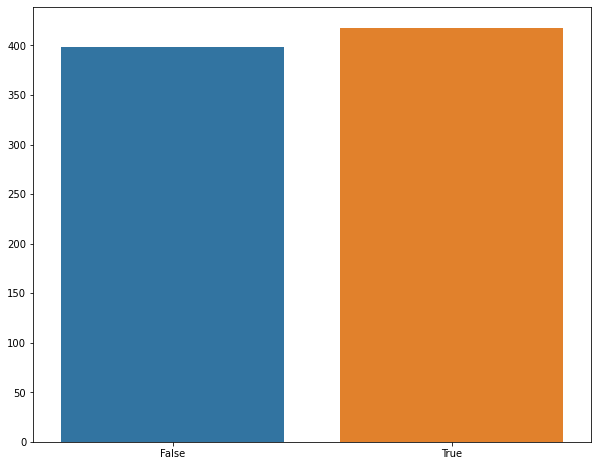

In [321]:
plt.figure(figsize=(10,8))
toss=(match["toss_winner"]==match["winner"]).value_counts()
sns.barplot(x=toss.index,y=toss)
plt.show()

Does choosing First bating or  First bowling help in winning matches?

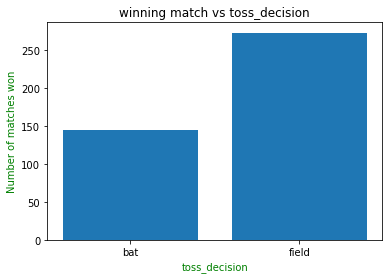

In [331]:
x=match[match["winner"]==match["toss_winner"]]
qq=x.groupby("toss_decision")["winner"].count()
plt.bar(qq.index,qq)
plt.title("winning match vs toss_decision")
plt.xlabel("toss_decision",color='g')
plt.ylabel("Number of matches won",color='g')
plt.show()

Match with biggest diffrence in margin

In [366]:
match.sort_values("result_margin",ascending=False).head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


player performance thought out ipl

In [335]:
Ball.head(5)
Ball["batsman"].value_counts()

V Kohli           4609
S Dhawan          4208
RG Sharma         4088
SK Raina          4041
DA Warner         3819
                  ... 
DP Vijaykumar        1
V Pratap Singh       1
Sunny Gupta          1
JL Denly             1
U Kaul               1
Name: batsman, Length: 537, dtype: int64

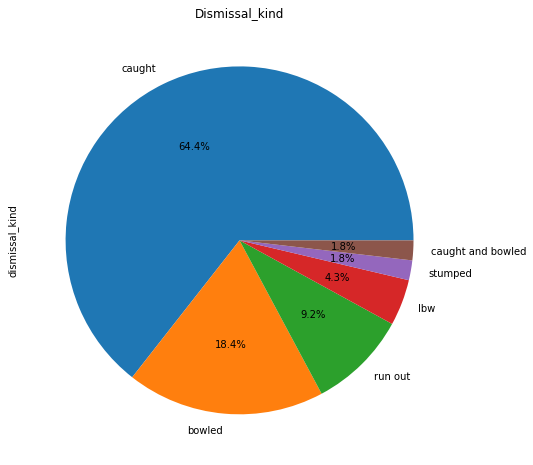

In [353]:
per=Ball[Ball["batsman"]=="V Kohli"]
plt.figure(figsize=(10,8))
per["dismissal_kind"].value_counts().plot(kind="pie",labels=per["dismissal_kind"].value_counts().index,autopct="%1.1f%%")
plt.xticks(rotation=True)
plt.title("Dismissal_kind")
plt.show()

Kohil we caught 64.4%  which is maximum in the pie chart

How many runs did each palyer scored from the data set

In [361]:
def count(df,runs):
    return(len(df[df["batsman_runs"]==runs])*runs)
print("Runs scored from 1's :",count(per,1))
print("Runs scored from 2's :",count(per,2))
print("Runs scored from 3's :",count(per,3))
print("Runs scored from 4's :",count(per,4))
print("Runs scored from 6's :",count(per,6))

Runs scored from 1's : 1919
Runs scored from 2's : 692
Runs scored from 3's : 39
Runs scored from 4's : 2016
Runs scored from 6's : 1212


v kohil scored most of his score by hitting boundary.

In [364]:
per.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [381]:
z=Ball.groupby("batsman")["batsman_runs"].sum().reset_index().rename(columns={"batsman_runs":"Total runs"}).sort_values("Total runs",ascending=False)
p=z.head(10)
z.head(10)


,batsman,Total runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


Top 10 players visulization with respect to runs

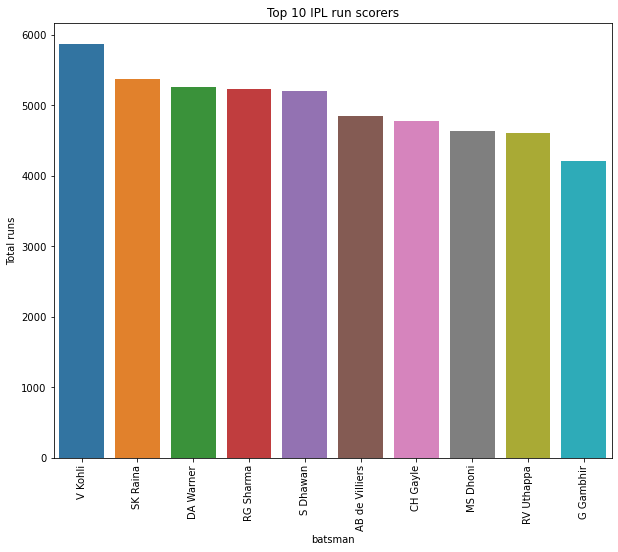

In [386]:
plt.figure(figsize=(10,8))
sns.barplot(x="batsman",y="Total runs",data=p)
plt.xticks(rotation=90)
plt.title("Top 10 IPL run scorers")
plt.show()

players who won man of the match award maximum number of times

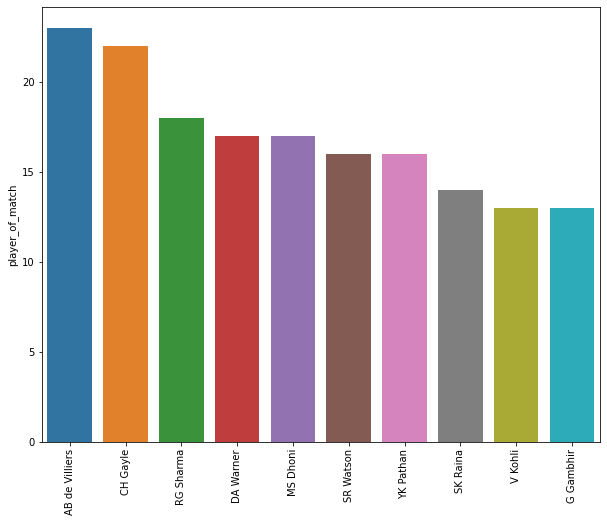

In [398]:
man=match["player_of_match"].value_counts().head(10)
plt.figure(figsize=(10,8))
sns.barplot(y=man,x=man.index)
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

AB de villiers won the man of the match award maximum times which is 23